<a href="https://colab.research.google.com/github/javmencia/COBWEBfiles/blob/main/STA410_Week9_HW8_submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA410 Week 9 Homework 8 (4 points)

Due 12 PM Feb 28 (before class starts)

1. **Paired or individual assignment.** Work may be shared within pairs without restriction, but collaborations beyond the pairs must be limited to "hints" and may not share complete solutions.


2. You are encouraged to adapt code you find available online **(including using AI chat bot suppport tools)** into your notebook; however, if you do so please provide a link to the utilized resource. ***If you don't and multiple students have the same answer an academic integrity proceeding may be undertaken.***  


3. **Library imports are limited** to only libraries imported in the starter code and the [standard python modules](https://docs.python.org/3/py-modindex.html). Automated code tests that fail because of additional library imports will not recieve credit. Unless a problem instructs differently you may use any functions available from the Python stdlib and the libraries imported in the starter code.


<details><summary><span style="color: blue; text-decoration: underline; cursor: pointer;">Additional Details</span></summary>

> **Do not delete, replace, or rearranged cells.** This erases `cell ids` upon which automated code tests are based. The "Edit > Undo Delete Cells" option in the notebook editor might be helpful; otherwise, redownload the notebook (so it has the correct required `cells ids`) and repopulate it with your answers (assuming you don't overwrite them when you redownload the notebook). ***You may add cells for scratch work*** but if required answers are not submitted through the provided cells where the answers are requested your answers may not be marked. Due to potential problems with `cell ids` **the only environments supported in this class are** [UofT JupyterHub](https://datatools.utoronto.ca/) or [Google Colab](https://colab.research.google.com/)
>
> **No jupyter shortcut commands** such as `! python script.py 10` or `%%timeit` may be included in the final submission as they will cause subsequent automated code tests to fail.
>
> **No cells may have any runtime errors** because this causes subsequent automated code tests to fail and you will not get marks for tests which fail because of previous runtime errors. ***Restart and re-run the cells in your notebook to ensure there are no runtime errors before submitting your work.***

</details>


## Student and Contribution

Are you working with a partner to complete this assignment?  
- If not, assign  the value of `None` into the variable `Partner`.
- If so, assign the name of the person you worked with into the variable `Partner`.
    - Format the name as `"<First Name> <Last Name>"` as a `str` type, e.g., "Scott Schwartz".

In [1]:
Partner = None
# This cell will produce a runtime error until you assign a value to this variable

What was your contribution in completing the code for this assignments problems?  
Assign one of the following into each of the `Contribution` variable below.

- `"I worked alone"`
- `"I contributed more than my partner"`
- `"My partner and I contributed equally"`
- `"I contributed less than my partner"`
- `"I did not contribute"`

In [2]:
Contribution = "I worked alone"
# This cell will produce a runtime error until you assign a value to this variable

In [3]:
# you may use any functions available from the following library imports

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Part 1 (2 points): Alternating Conditional Expectation (ACE) algorithm

The linear association of two variables is measured with correlation

$$\rho_{xy} = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}} \quad \textrm{ estimated as } \quad
\frac{\sum_{i=1}^n(x_i-\bar x)(y_i^2-\bar y)}{\sqrt{\sum_{i=1}^n(x_i-\bar x)^2}\sqrt{\sum_{i=1}^n(y_i-\bar y)^2}}$$


And two variables are **linearly independent** if $\rho_{xy}=0$ but are not necessrily **statistically independent**.
For example, $\rho_{xy}=0$ for $Y=X^2+\epsilon$ with $X\sim \text{Uniform}(-1,1)$ and $\epsilon\sim \text{Normal}(\mu=0, \sigma=0.1)$, but these variables are clearly **statistically dependent** and $\rho_{x^2y}\approx0.948$.

The **maximal correlelation** $\displaystyle \max_{\phi, \psi} \rho_{\phi(x)\psi(y)}$ is the transformation of the random variables producing the larget **correlation** between the variables possible. The **maximal correlelation** in the above example is achieved at $\phi(x)=x^2$ and $\psi(y)=y$.

Finding **maximal correlelation** means finding $\phi$ and $\psi$ which transform the **joint distribution** $p(X,Y)$ to $p(\phi(X),\psi(Y))$ which is as close as possible to a **standard bivariate normal distirbution** with $E[\phi(X)] = 0$, $E[\phi(X)^2] = 1$, $E[\psi(Y)] = 0$, $E[\psi(Y)^2] = 1$ and **maximal correlelation** $\displaystyle \max_{\phi,\psi} E[\phi(X)\psi(Y)] = \rho_{\max} \in [0,1]$ which occurs when
$$E[\phi(X)|Y=y] =\int \phi(x) \frac{p(x,y)}{p(y)}dx =\psi(y)\rho_{\max}$$
$$E[\psi(Y)|X=x] =\int \psi(y) \frac{p(x,y)}{p(x)}dy =\phi(x)\rho_{\max}$$

There is no closed form solution for ***maximal correlelation***, but the above requirements suggest iterative estimation through **backfitting** as

- $\hat{\phi(x)} = E[\hat{\psi(y)}|x]$ followed by replacing $\hat{\phi(x)}$ with its standardization $\frac{\hat{\phi(x)} - \text{mean}(\hat{\phi(x)})}{\text{std}(\hat{\phi(x)})}$
- $\hat{\psi(y)} = E[\hat{\phi(x)}|y]$ followed by replacing $\hat{\psi(y)}$ with its standardization $\frac{\hat{\psi(y)} - \text{mean}(\hat{\psi(y)})}{\text{std}(\hat{\psi(y)})}$

where the expectations $\hat{\phi(x)} = E[\hat{\psi(y)}|x]$ and $\hat{\psi(y)} = E[\hat{\phi(x)}|y]$ suggest the need for flexible prediction which can be executed via **LOWESS smoothing** or **bsplines** regression.

Initialize `phi_y` $=\hat{\psi_0(y)} = y$  and use the **standardized** output of `sm.nonparametric.lowess(phi_0_y, x, frac=p, return_sorted=False)` for `phi_x` $= \hat{\phi_1(x)}$ and then use the **standardized** output of `sm.nonparametric.lowess(phi_x, y, frac=p, return_sorted=False)` for `phi_y` $=\hat{\psi_1(y)}$ to complete the first update iteration.

(0.06487121395360204, 0.9495816415244835)

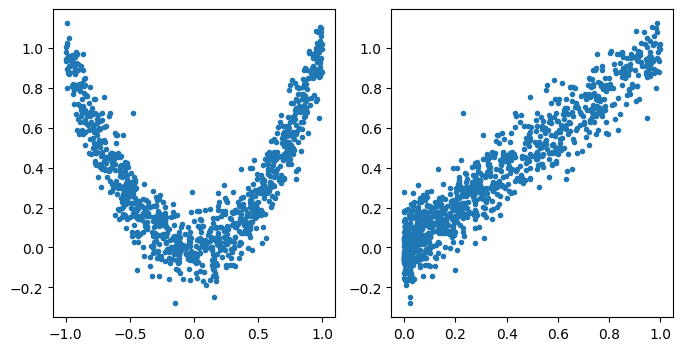

In [4]:
np.random.seed(410)
n = 1000
x = stats.uniform(-1,2).rvs(n)
y = x**2 + stats.norm(0,0.1).rvs(n)

fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(x,y,'.'); ax[1].plot(x**2,y,'.')
np.corrcoef(x,y)[0,1], np.corrcoef(x**2,y)[0,1]

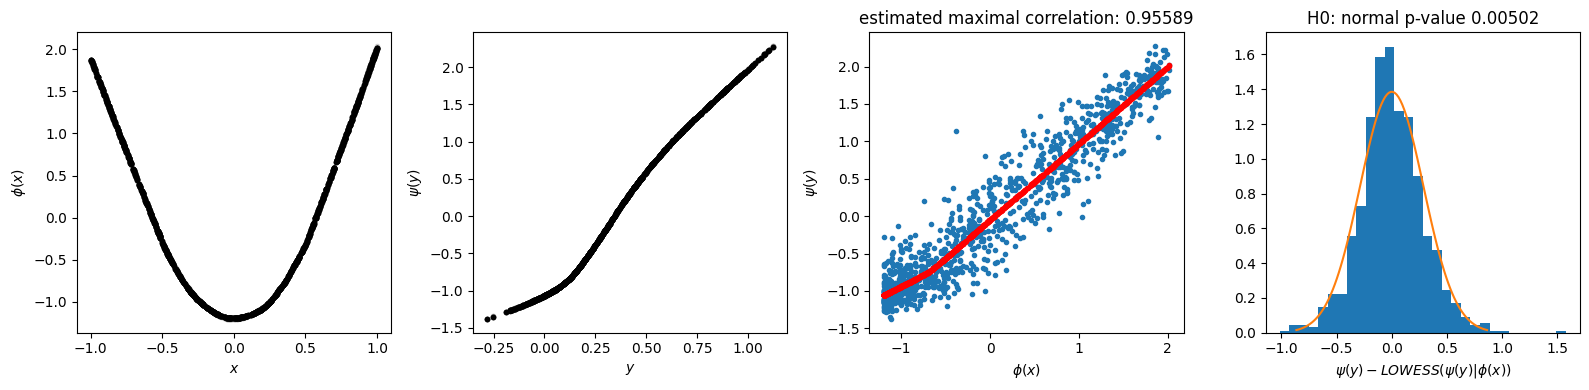

In [14]:
fig,ax = plt.subplots(1,4,figsize=(16,4))

psi_y = y; p = 0.5; T=5
psi_y = (psi_y - psi_y.mean())/psi_y.std()
for s in range(T):

    # update phi_x
    phi_x = sm.nonparametric.lowess(psi_y, x, frac=p, return_sorted=False)
    phi_x = (phi_x - phi_x.mean())/phi_x.std()
    ax[0].plot(x, phi_x, '.', c=str(1-(s+1)/T))

    # update psi_y
    psi_y = sm.nonparametric.lowess(phi_x, y, frac=p, return_sorted=False)
    psi_y = (psi_y - psi_y.mean())/psi_y.std()
    ax[1].plot(y, psi_y, '.', c=str(1-(s+1)/T))

ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$\\phi(x)$')
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$\\psi(y)$')
ax[2].set_xlabel('$\\phi(x)$')
ax[2].set_ylabel('$\\psi(y)$')
ax[3].set_xlabel('$\\psi(y)-LOWESS(\\psi(y)|\\phi(x))$')
ax[2].plot(phi_x, psi_y, '.')
ax[2].set_title("estimated maximal correlation: "+str(np.round(np.corrcoef(phi_x, psi_y)[0,1],5)))
E_psi_y_G_phi_x = sm.nonparametric.lowess(psi_y, phi_x, frac=p, return_sorted=False)
ax[2].plot(phi_x, E_psi_y_G_phi_x, 'r.')
ax[3].hist(psi_y-E_psi_y_G_phi_x, density=True, bins=30)
support = np.linspace(-1,1,100)*(psi_y-E_psi_y_G_phi_x).std()*3
ax[3].plot(support, stats.norm((psi_y-E_psi_y_G_phi_x).mean(), np.std(psi_y-E_psi_y_G_phi_x)).pdf(support))
ax[3].set_title("H0: normal p-value "+\
      str(np.round(sm.stats.diagnostic.kstest_normal(psi_y-E_psi_y_G_phi_x, dist='norm', pvalmethod='table')[1],5)))
np.corrcoef(phi_x, psi_y)[0,1]
plt.tight_layout()


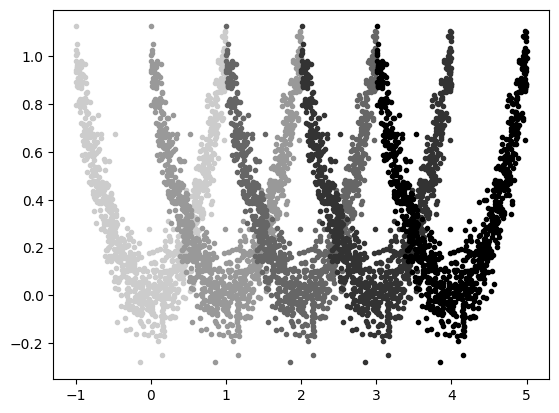

In [ ]:
# Hint: `c=str(1-(s+1)/T)` will let you visualize the iterative progress of the algorithm
#       which will help you choose the number of iterations T that are needed to complete ACE
T=5
for s in range(T):
    plt.plot(x+s, y, '.', c=str(1-(s+1)/T))

### Part 1 Questions
1. For the data set above with `n=1000` based on `np.random.seed(410)`, find a two-decimal `p` for `frac=p` for which **ACE** algorithm indeed estimates the **maximal correlation** to be between $0.945$ and $0.950$ and demonstrate using the visualization template provided above.

2. Adjust the **ACE** algorithm to fix `psi_y` under the assumption that $\hat{\psi(y)}=y$ and then find a two-decimal `p` for `frac=p` for which this adjsuted version of the algorithm estimates the **maximal correlation** to be between $0.947$ and $0.949$. Visually demonstrate this in the same manner as the previous problem.


In [9]:
# 0.4 points each

# p fraction between 0 and 1 with two decimal values
p1q1 = "p=0.73" # e.g. `p=0.12` producing maximal correlation between 0.945 and 0.950 (caputring 0.948)

# p fraction between 0 and 1 with two decimal values
p1q2 = "p=0.52" # e.g. `p=0.12` producing maximal correlation between 0.947 and  0.949 (caputring 0.948)


[[0.74, 0.9451713187355628], [0.73, 0.945962950599952], [0.72, 0.9462887213697398], [0.71, 0.9466984913770583], [0.7000000000000001, 0.947196572197892], [0.6900000000000001, 0.9480137108135748], [0.68, 0.948611883195214], [0.67, 0.9491543969025672], [0.66, 0.9497838211354386], [0.05, 0.9489699014871974], [0.04, 0.9470634585397788], [0.03, 0.9464097333080923], [0.02, 0.9495049287372349]]


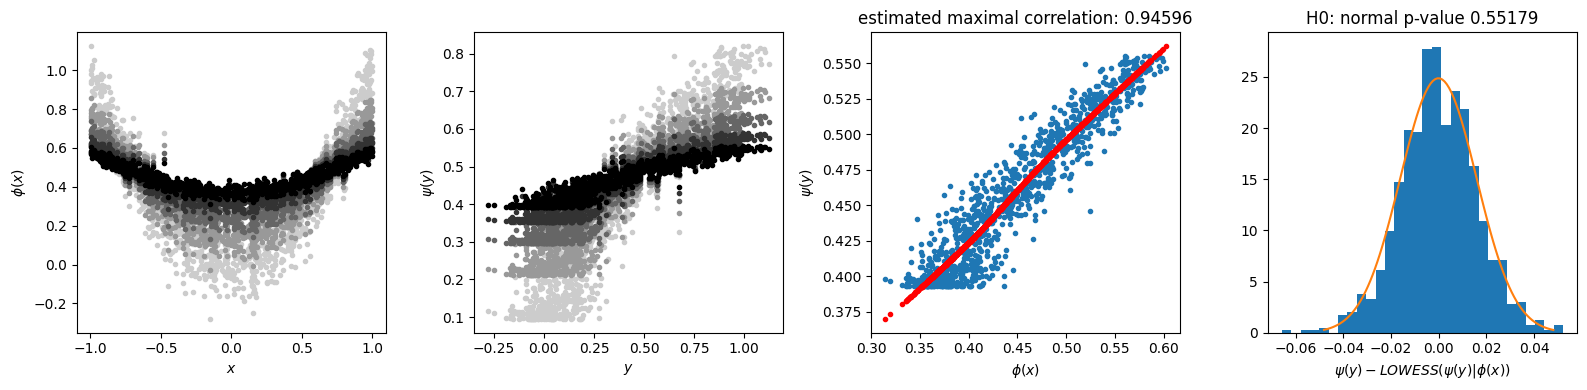

In [10]:
# Function to run ACE algorithm
def ace_algorithm(x, y, p, T=5, fix_psi_y=False):

    # Initial setting
    psi_y = y
    psy_y = (psi_y - psi_y.mean())/psi_y.std()
    for s in range(T):
        # Update phi_x
        phi_x = sm.nonparametric.lowess(psi_y, x, frac=p, return_sorted=False)
        phi_x = (phi_x - phi_x.mean())/phi_x.std()

        # update psi_y
        psi_y = sm.nonparametric.lowess(phi_x, y, frac=p, return_sorted=False)
        psi_y = (psi_y - psi_y.mean())/psi_y.std()


    # Compute maximal correlation
    max_corr = np.corrcoef(phi_x, psi_y)[0, 1]


    return max_corr

# Find p for Part 1
p_values = np.linspace(0, 1, 101)[::-1]
mcs = []
best_p_1 = None
for p in p_values:
    max_corr = ace_algorithm(x, y, p)


    if 0.945 <= max_corr <= 0.950:

        mcs.append([p, max_corr])

print(mcs)
best_p_1 = mcs[1][0]
fig,ax = plt.subplots(1,4,figsize=(16,4))

psi_y = y; p = best_p_1; T=5
for s in range(T):

    # update phi_x
    phi_x = sm.nonparametric.lowess(psi_y, y, frac=p, return_sorted=False)
    ax[0].plot(x, phi_x, '.', c=str(1-(s+1)/T))

    # update psi_y
    psi_y = sm.nonparametric.lowess(phi_x, x, frac=p, return_sorted=False)
    ax[1].plot(y, psi_y, '.', c=str(1-(s+1)/T))

ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$\\phi(x)$')
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$\\psi(y)$')
ax[2].set_xlabel('$\\phi(x)$')
ax[2].set_ylabel('$\\psi(y)$')
ax[3].set_xlabel('$\\psi(y)-LOWESS(\\psi(y)|\\phi(x))$')
ax[2].plot(phi_x, psi_y, '.')
ax[2].set_title("estimated maximal correlation: "+str(np.round(np.corrcoef(phi_x, psi_y)[0,1],5)))
E_psi_y_G_phi_x = sm.nonparametric.lowess(psi_y, phi_x, frac=p, return_sorted=False)
ax[2].plot(phi_x, E_psi_y_G_phi_x, 'r.')
ax[3].hist(psi_y-E_psi_y_G_phi_x, density=True, bins=30)
support = np.linspace(-1,1,100)*(psi_y-E_psi_y_G_phi_x).std()*3
ax[3].plot(support, stats.norm((psi_y-E_psi_y_G_phi_x).mean(), np.std(psi_y-E_psi_y_G_phi_x)).pdf(support))
ax[3].set_title("H0: normal p-value "+\
      str(np.round(sm.stats.diagnostic.kstest_normal(psi_y-E_psi_y_G_phi_x, dist='norm', pvalmethod='table')[1],5)))
np.corrcoef(phi_x, psi_y)[0,1]
plt.tight_layout()


[[0.53, 0.9473323838769646], [0.52, 0.9474767970296241], [0.51, 0.9476783798844051], [0.5, 0.9477984791267363], [0.49, 0.9479739527431066], [0.48, 0.9481438169326266], [0.47000000000000003, 0.9482804648143365], [0.46, 0.9485705135386907], [0.45, 0.9486319964625561], [0.44, 0.9486763460326674], [0.43, 0.9487200643557211], [0.42, 0.9487629523043448], [0.41000000000000003, 0.9488487160794327], [0.4, 0.9489289418520762], [0.39, 0.9489702130492079]]


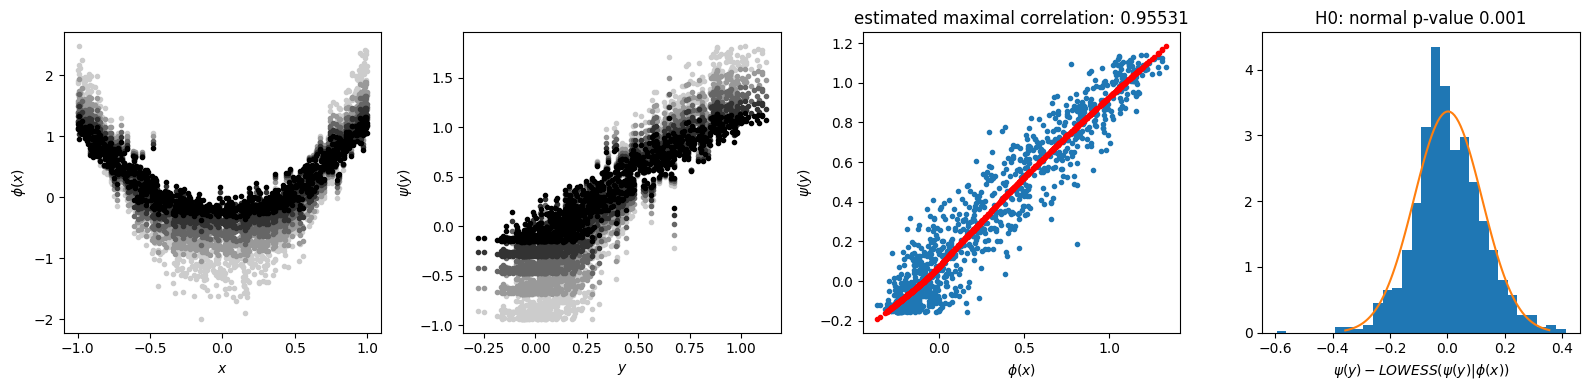

In [11]:
# Find p for Part 2 (fix psi_y = y)
def ace_algorithm(x, y, p, T=5, fix_psi_y=False):

    # Initial setting
    psi_y = y

    for s in range(T):

        # update phi_x
        phi_x = sm.nonparametric.lowess(psi_y, x, frac=p, return_sorted=False)
        phi_x = (phi_x - phi_x.mean())/phi_x.std()

        # Compute maximal correlation
        max_corr = np.corrcoef(phi_x, psi_y)[0, 1]


    return max_corr
best_p_2 = None
mcs = []
for p in p_values:
    max_corr = ace_algorithm(x, y, p, fix_psi_y=True)

    if 0.947 <= max_corr <= 0.949:
        mcs.append([p, max_corr])


print(mcs)
best_p_2 = mcs[1][0]
fig,ax = plt.subplots(1,4,figsize=(16,4))

psi_y = y; p = best_p_2; T=5
psi_y = (psi_y - psi_y.mean())/psi_y.std()
for s in range(T):

    # update phi_x
    phi_x = sm.nonparametric.lowess(psi_y, y, frac=p, return_sorted=False)
    ax[0].plot(x, phi_x, '.', c=str(1-(s+1)/T))

    # update psi_y
    psi_y = sm.nonparametric.lowess(phi_x, x, frac=p, return_sorted=False)
    ax[1].plot(y, psi_y, '.', c=str(1-(s+1)/T))

ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$\\phi(x)$')
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$\\psi(y)$')
ax[2].set_xlabel('$\\phi(x)$')
ax[2].set_ylabel('$\\psi(y)$')
ax[3].set_xlabel('$\\psi(y)-LOWESS(\\psi(y)|\\phi(x))$')
ax[2].plot(phi_x, psi_y, '.')
ax[2].set_title("estimated maximal correlation: "+str(np.round(np.corrcoef(phi_x, psi_y)[0,1],5)))
E_psi_y_G_phi_x = sm.nonparametric.lowess(psi_y, phi_x, frac=p, return_sorted=False)
ax[2].plot(phi_x, E_psi_y_G_phi_x, 'r.')
ax[3].hist(psi_y-E_psi_y_G_phi_x, density=True, bins=30)
support = np.linspace(-1,1,100)*(psi_y-E_psi_y_G_phi_x).std()*3
ax[3].plot(support, stats.norm((psi_y-E_psi_y_G_phi_x).mean(), np.std(psi_y-E_psi_y_G_phi_x)).pdf(support))
ax[3].set_title("H0: normal p-value "+\
      str(np.round(sm.stats.diagnostic.kstest_normal(psi_y-E_psi_y_G_phi_x, dist='norm', pvalmethod='table')[1],5)))
np.corrcoef(phi_x, psi_y)[0,1]
plt.tight_layout()

In [ ]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [ ]:
# Cell for scratch work


In [ ]:
p1q3 = "The (second) adjusted ACE algorithm is an iterative backfitting method"

p1q4 = "Initializing the ACE algorithm with the adjusted ACE algorithm is not just ACE"

p1q5 = "The transformations of the ACE algorithm for `frac=0.01` could be described as C"
# A: smooth (continuously differentiable)
# B: overfit (high variance)
# C: underfit (high bias)
# D: none of the above

p1q6 = "The transformations of the ACE algorithm for `frac=0.05` could be described as C"
# Same options as above

p1q7 = "The transformations of the ACE algorithm for `frac=0.50` could be described as A"
# Same options as above

p1q8 = "The transformations of the ACE algorithm for `frac=0.90` could be described as B"
# Same options as above

p1q9 = 'The high bias version of this "model" has the character of a stair step shape'

p1q10 = "When the p-value for the `sm.stats.diagnostic.kstest_normal` test above is not significant "+\
        "then the bivariate normal assumption on the transformed data is likely very good"

p1q11 = "Assuming the p-value for the `sm.stats.diagnostic.kstest_normal` test being less than 0.05 "+\
        'indicates "over-transformation away from normality" (and misestimated maximal correlation) '+\
        "the values of `p` A could be used for `frac=p` for the ACE algorithm "
# A: less than 0.55
# B: between 0.6 and 0.75
# C: greater than 0.8
# D: all of the above

p1q12 = "Assuming the p-value for the `sm.stats.diagnostic.kstest_normal` test being less than 0.05 "+\
        'indicates "over-transformation away from normality" (and misestimated maximal correlation) '+\
        "the values of `p` A could be used for `frac=p` for the (second) adjusted ACE algorithm"
# A: less than 0.55
# B: between 0.6 and 0.75
# C: greater than 0.8
# D: All of the above

p1q13 = "The C in the given psi_y vs phi_x plot above suggest(s) good maximal correlation estimation"
# A: linearity
# B: homoeskedasticity
# C: Both of the above
# D: None of the above

p1q14 = "The C in the analogous phi_x versus psi_y plot suggest(s) good maximal correlation estimation"
# A: linearity
# B: homoeskedasticity
# C: Both of the above
# D: None of the above



## Part 2 (2 points): Gauss-Seidel and Coordinate Descent

All **direct methods** solving $X^TX\beta = X^Ty$ (our "favorite" $A_{p\times p}x = b$ problem)
are beholden by the $O(np^2)$ requirements of $X^TX$ (or **SVD** or **QR**).
The $A_{p\times p}x = b$ problem itself, however, can be solved either directly or with **Cholesky** in $O(p^3)$. But this will still be computationally intractable for large $p$.

The solution can be iteratively approximated with $s$ steps of the $O(sp^2)$ **Gauss-Seidel** method based on the **additive factorization**

\begin{align*}
\color{gray}{X^T\!X \hat \beta = X^T \! y \; \Rightarrow \;}
A_{p \times p}x = {} & b \quad \color{gray}{A = (L + D + U) \text{ decomposition costs nothing}} \\
(L + D + U)x = {} & b \quad \color{gray}{\text{$D$ diagonal $L$/$U$ zero diagonal upper/lower triangular}} \\ \hline
(L+D)x^{(k+1)} = {} & b -  Ux^{(k)} \\
x^{(k+1)} = {} & (D+L)^{-1}b - (D+L)^{-1}Ux^{(k)} \color{gray}{= v + Cx^{(k)} \leftarrow \text{converge?}}\\
\color{blue}{\text{or just } \quad Dx^{(k+1)}} = {} & \color{blue}{b - Lx^{(k+1)} - Ux^{(k)}}
\end{align*}

This prescribes a sequence of iteratively updates which may improve(?) solution approximations


$$\color{blue}{x^{(k+1)}_i = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{p} a_{ij}x_j^{(k)} \right)} \quad
\color{red}{\text{started with some initial value $x^{(0)}$}}$$


---

> **Gauss-Seidel** converges so that $\quad\Delta(b-Ax^{(k)}, b-Ax^{(k+1)}) \rightarrow 0\quad$ if any of the following hold:
>
> - the largest **eigenvalue**, referred to as the **spectral radius** $\quad \rho\left((L + D)^{-1}U\right)<1$
>
>     - and convergence is faster for smaller **spectral radius** which is proven using convergence properties of the **matrix power series** $\sum_{k=0}^{\infty}C^k = (I - C)^{-1}$
>
> - $A$ is **symmetric** and $A$ and $D$ and $D-L-U = D - L - L^T$ are ***positive definite***
>
>     - which is proven based on ***eigenvalues*** of $C= - (L + D)^{-1} U = - (L + D)^{-1}(D + L - A)$
>
> - $A$ is **strictly diagonally dominant** so  $\quad |a_{ii}| > \sum_{i \neq j} |a_{ij}| \; \text{ for all } i$
    - which is proven using the invertibilty of ***strictly diagonally dominant matrices***

---


The **Jacobi** algorithm instead specifies

$$x^{(k+1)}_i = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{\overset{\color{red}{\text{or }(k)}}{(k+1)}} - \sum_{j=i+1}^{p} a_{ij}x_j^{(k)} \right)$$

In [ ]:
p2q1 = "The Jacobi algorithm requires twice as much memory "+\
       "as the Gauss-Seidel algorithm"

p2q2 = "For the update of the ith element of x at step k+1 as given above "+\
       "these algorithms specify p multiplication-division operations"
# count division as if it was just multiplication

p2q3 = "For the update of the ith element of x at step k+1 as given above "+\
       "these algorithms specify p-1 addition-substraction operations"
# count subtraction as if it was just addition

p2q4 = "The total step k+1 update for these algorithms thus requires "+\
       "2*(p-1)*p total numeric operations"

p2q5 = "For a sparse matrix A with m zeros on each row, if a sparse matrix data structure "+\
       "and corresponding algorithm that can ignore all zeros is used, the step k+1 update "+\
       "for these algorithms requires a total number of non-zero-based numeric operations of "+\
       "2*(p-m)*p"
       #<2*p|p*p|2*p*p|2*p*(p+1)|2*(p-1)*p|2*(p-1)*(p-1)|2*(p-1)*(p+1)>

p2q6 = "The computational complexity for the sparse matrix A above and a "+\
       'corresponding "sparse Guass-Seidel algorithm" is C'
# A: O(p*p*p)
# B: O((p-m)*p*p)
# C: O((p-m)*p*s)
# D: none of the above


## Coordinate Descent

---

**Coordinate descent** finds an optimum of a scalar valued multivariate function $f(x)$ by iteratively optimizing one variable $x_j$ at a time, cycling through the elements of $x^{(k)}$ until stabilization.


For example, for **symmetric positive definite** $A$ we have

\begin{align*}
f(x) = \frac{1}{2} x^TAx - x^Tb + c ={}& \frac{1}{2}\sum_j\sum_k a_{jk}x_j x_k + \sum_j b_j x_j + c\\
\frac{\partial}{\partial x_i } f(x) = {} & a_{ii}x_i - b_i + \sum_{j \not = i} a_{ij}x_j \; \overset{\text{set to}}{= 0}\\
\Longrightarrow \quad x_i =  {} &\frac{1}{a_{ii}}\left(b_i - \sum_{j \not = i} a_{ij}x_j\right)
\end{align*}

> ### Gradients
> ---
>
> The **gradient operator** $\nabla_{x}$ generalizes the **derivative** for scalar quantities as the vector of **partial derivatives** with respect to the input $x_i$ of its scalar valued multivariate function argument $f_x$
>
> $$ \nabla_{x}(f_x) = \frac{\partial f_x}{\partial x_1} e_1 + \cdots + \frac{\partial f_x}{\partial x_i} e_i + \cdots + \frac{\partial f_x}{\partial x_n} e_n \quad \text{for }\textbf{standard basis vectors} \;e_i$$
>
> The **derivative** and the **gradient operators** (functions of functions returning functions) are **linear**
>
> $$\nabla_{x}(af_x+bg_x) = a\nabla_{x}(f_x) + b\nabla_{x}(g_x)$$
>
> and have some simple rules such as $\quad \nabla_{x} x^Tb = b \quad \text{ and } \quad \nabla_{x} x^TAx = 2Ax$
>
> $$\scriptsize
\begin{align*}
\text{so for example} \quad \nabla_{x} \left[ (b - Ax)^T A^{-1} (b - Ax) \right]= {} &
\underbrace{\nabla_{x} \left[ x^TAx - 2b^Tx + b^TA^{-1}b \right]}_{\text{gradients have scalar-like derivative rules}\quad\quad\quad\quad\quad}\\
0 = {} & \overbrace{- 2b^T + 2(x)^TA}\\
 = {} & -(b - Ax)  \Longrightarrow Ax = b
\end{align*}$$
>
> ### Norms (and Metrics)
>
> ---
>
> For **symmetric positive definite** $A$ (such as $X^T\!X \hat \beta = X^T \! y$ for **full rank** $X$) all of the following have the same unique **global minimum** (due to their **convex** nature owing to the **positive definite** character of $A$
>
> - $\underset{x}{\text{argmin}} ||b - Ax||_p = \overbrace{\left( \sum_{i=1}^n (b - Ax)_i^p \right)^{\frac{1}{p}}}^{L_p \text{ norm or }\Delta_p(b,Ax)\text{ metric}} \overset{p=2}{=} \underset{1 \times 1}{\sqrt{(b - Ax)^T (b - Ax)}}$
> - $\underset{x}{\text{argmin}} ||b - Ax||_2^{A^{-1}} = ||\underbrace{(b - Ax)^T A^{-1} (b - Ax)}_{1 \times 1: \text{ mahalanobis distance}}||_2 \quad \text{the }\textbf{elliptical norm}$
> - $\underset{x}{\text{argmin}} \frac{1}{2}x^TAx - x^Tb + c$


In [ ]:
p2q7 = "C below shows that coordinate descent optimization above "+\
       "solves Ax=b for symmetric positive definite A"
# A: grad_x [ x.T@(Ax - b) + c = Ax - b ]
# B: grad_x [ x.TA.T@(Ax)-2b.T@Ax + b.T@b = 2x.TA.T@A-2b.T@A = A.T@(2Ax-2b) ]
# C: both of the above
# D: none of the above

p2q8 = "For the given quadratic function f(x) given above "+\
       "the coordinate descent algorithm is the same as the A"
# A: Gauss-Seidel algorithm
# B: Jacobi algorithm
# C: both of the above
# D: none of the above

p2q9 = "Coordinate descent is a form of backfitting; "+\
       "Gauss-Seidel is a form of backfitting; "+\
       "The Jacobi algorithm is not a form of backfitting; "+\
       "Nonlinenear Gauss-Seidel is a form of backfitting"

p2q10 = "The eigenvalues for square symmetric positive definite matrices "+\
        "are the same as the singular values"

# For Gauss-Seidel indidated as GS and successive overrelaxation as OR
# and A and A_ as given below
p2q11 = "The fastest to slowest converging algorithm is "+\
        "GS with omega=0.5 OR on A2 -> GS on A2 -> GS with omega=0.5 OR on A1 -> GS on A1"
        # keep format above but order from fastest to slowest convergence

p2q12 = 'Assuming "reaches the black line" in the plot below '+\
        "indicates a sufficient approximation the then O(spp) < O(npp) "+\
        "objective can be acheived for A2"



### Successive Overrelaxation
---

**Successive overrelaxation** uses weighted averages of current $x_i^{(k)}$ and iterative update, so for **Gauss-Seidel**  
$$x_i^{(k+1)} = \overbrace{\underset{\text{last answer $x_i^{(k)}$}}{\underbrace{(1-\omega)x_i^{(k)}}_{\text{weighted with}}} + \omega}^{\text{if $\omega=1$ this goes away}}\underbrace{\frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{p} a_{ij}x_j^{(k)} \right)}_{\text{and we're just left solving the Gauss-Seidel equations}}$$

$$\begin{align*}
Ax = (L + D + U )x = {} &  b \\
\omega Lx + (\omega - 1 + 1) D x = {} & \omega (b -  Ux) \\
\omega Lx +  D x = {} & (1-\omega) Dx + \omega (b -  Ux) \\ \hline
(\omega L +  D) x^{(k+1)} = {} & (1-\omega) Dx^{(k)} + \omega (b -  Ux^{(k)}) \\
 D x^{(k+1)} = {} & (1- \omega)Dx^{(k)} + \omega( b -  Lx^{(k+1)} -  Ux^{(k)})  
\end{align*}$$

providing faster convergence if **spectral radius**
$\rho\left((\omega L + D)^{-1}\omega U\right)<\rho\left((L + D)^{-1}U\right)<1$


### Complete the Gauss-Seidel algorithm<br>and Successive Overrelaxation version of the Gauss-Seidel algorithms below<br>for the two provided matrices

In [ ]:
p = 100
A1 = np.diag(np.ones(p)) + 1.0
A2 = np.diag(np.ones(p)) + 0.2

print(np.linalg.cond(A1).round(), np.linalg.eigvals(A1).max().round(),np.linalg.svd(A1)[1].max().round())
print(np.linalg.cond(A2).round(), np.linalg.eigvals(A2).max().round(),np.linalg.svd(A2)[1].max().round())

101.0 (101+0j) 101.0
21.0 (21+0j) 21.0


In [ ]:
L1,D1,U1 = A1.copy(),np.diag(np.diag(A1)),A1.copy()
L1[np.triu_indices(p)] = 0
U1[np.tril_indices(p)] = 0
# https://numpy.org/doc/stable/reference/generated/numpy.tril_indices.html

L2,D2,U2 = A2.copy(),np.diag(np.diag(A2)),A2.copy()
L2[np.triu_indices(p)] = 0
U2[np.tril_indices(p)] = 0

print(np.linalg.eigvals(np.linalg.inv(L1+D1)@U1)[:5])
print(np.linalg.eigvals(np.linalg.inv(L2+D2)@U2)[:5])
omega=0.5
print(np.linalg.eigvals(np.linalg.inv(omega*L1+D1)@(omega*U1))[:5])
print(np.linalg.eigvals(np.linalg.inv(omega*L2+D2)@(omega*U2))[:5])

[ 0.        +0.j         -0.99427814+0.06170156j -0.99427814-0.06170156j
 -0.97763523+0.12044612j -0.97763523-0.12044612j]
[ 0.        +0.j         -0.91262   +0.27169925j -0.91262   -0.27169925j
 -0.72487334+0.42429261j -0.72487334-0.42429261j]
[ 0.        +0.j         -0.96313221+0.17540111j -0.96313221-0.17540111j
 -0.86855167+0.31169265j -0.86855167-0.31169265j]
[ 0.        +0.j         -0.715978  +0.45122244j -0.715978  -0.45122244j
 -0.37836662+0.47710288j -0.37836662-0.47710288j]


In [ ]:
# target

x_true = np.ones((p,1))
b1 = A1.dot(x_true)
b2 = A2.dot(x_true)

np.c_[np.linalg.solve(A1,b1),np.linalg.solve(A2,b2)][:5,:]

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

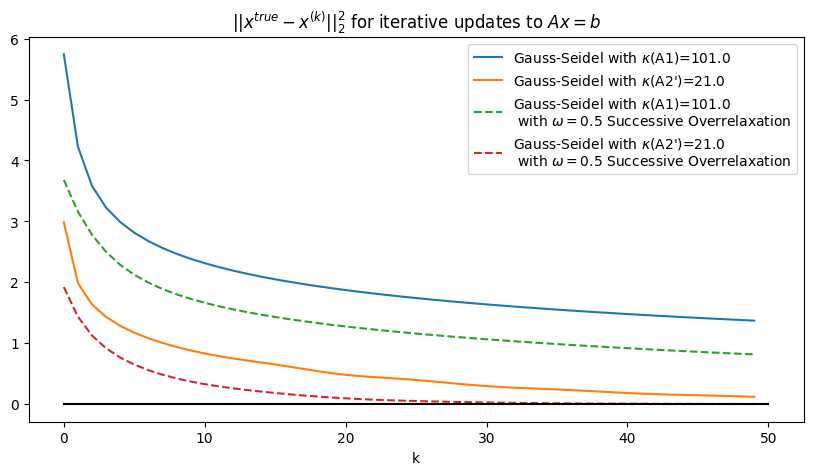

In [ ]:
# initialize
# For A1
x1_GS = x_true+0.1
x1_GSOR = x_true+0.1
# For A2
x2_GS = x_true+0.1
x2_GSOR = x_true+0.1

# convergence tracking
x1true_GS_L2norm = np.zeros(int(p/2))
x2true_GS_L2norm = np.zeros(int(p/2))
x1true_GSOR_L2norm = np.zeros(int(p/2))
x2true_GSOR_L2norm = np.zeros(int(p/2))


for i in range(int(p/2)):
    # Gauss-Seidel for A1
    for j in range(p):
        x1_GS[j] = (b1[j] - np.dot(A1[j,:j], x1_GS[:j]) - np.dot(A1[j,j+1:], x1_GS[j+1:])) / A1[j,j]
    delta = x_true - x1_GS
    x1true_GS_L2norm[i] = np.linalg.norm(delta)

    # Gauss-Seidel for A2
    for j in range(p):
        x2_GS[j] = (b2[j] - np.dot(A2[j,:j], x2_GS[:j]) - np.dot(A2[j,j+1:], x2_GS[j+1:])) / A2[j,j]
    delta = x_true - x2_GS
    x2true_GS_L2norm[i] = np.linalg.norm(delta)

    # Successive Overrelaxation (SOR) for A1
    for j in range(p):
        x1_GSOR[j] = (1 - omega) * x1_GSOR[j] + omega * (b1[j] - np.dot(A1[j,:j], x1_GSOR[:j]) - np.dot(A1[j,j+1:], x1_GSOR[j+1:])) / A1[j,j]
    delta = x_true - x1_GSOR
    x1true_GSOR_L2norm[i] = np.linalg.norm(delta)

    # Successive Overrelaxation (SOR) for A2
    for j in range(p):
        x2_GSOR[j] = (1 - omega) * x2_GSOR[j] + omega * (b2[j] - np.dot(A2[j,:j], x2_GSOR[:j]) - np.dot(A2[j,j+1:], x2_GSOR[j+1:])) / A2[j,j]
    delta = x_true - x2_GSOR
    x2true_GSOR_L2norm[i] = np.linalg.norm(delta)


plt.figure(figsize=(10,5))
plt.plot(x1true_GS_L2norm, label="Gauss-Seidel with $\\kappa$(A1)="+str(np.linalg.cond(A1).round()))
plt.plot(x2true_GS_L2norm, label="Gauss-Seidel with $\\kappa$(A2')="+str(np.linalg.cond(A2).round()))
plt.plot(x1true_GSOR_L2norm, label="Gauss-Seidel with $\\kappa$(A1)="+str(np.linalg.cond(A1).round())+"\n with $\\omega=$" + str(omega) + " Successive Overrelaxation", linestyle='--')
plt.plot(x2true_GSOR_L2norm, label="Gauss-Seidel with $\\kappa$(A2')="+str(np.linalg.cond(A2).round())+"\n with $\\omega=$" + str(omega) + " Successive Overrelaxation", linestyle='--')
plt.plot([0,p/2],2*[0],'k-')
plt.title("$||x^{true}-x^{(k)}||_2^2$ for iterative updates to $Ax = b$")
plt.xlabel("k")
plt.legend();

In [ ]:
# Cell for scratch work

# You are welcome to add cells into your notebook but
# just don't runtime errors anywhere in your notebook
# as cells are run sequentially for automated testing

# Automated testing is looking for cells (`cell ids`)
# where you're asked to enter answers or complete code
# but all other cells like this one or cells you add
# are safe to delete if you want a "cleaner" notebook


In [ ]:
# Cell for scratch work